#Análise de reservas em hotéis

###**Resort Hotel e City Hotel**

###**Problema de negócio**: Ambos os hóteis a serem analisados vem notando altas taxas de cancelamento, resultando em receitas menores e um uso abaixo do esperado dos quartos.
###**Objetivo da análise:** Buscar entender o que tem gerado as altas taxas de cancelamento e como o problema poderia ser contornado, aumentando a eficiência na geração de receita.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

resort_hotel = pd.read_csv("H1.csv")
city_hotel = pd.read_csv("H2.csv")

In [ ]:
city_hotel.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [ ]:
city_hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31321.000000,31324.000000,31324.0,31324.0,31324.0,31324.000000,31324.000000,31324.000000,31324.000000,31324.000000
mean,0.816632,126.224709,2016.094493,26.989050,15.655866,0.793551,2.295451,1.865507,0.083043,0.002969,0.0,0.0,0.0,0.120834,6.470310,103.276636,0.005204,0.316020
std,0.386974,116.185810,0.701220,13.532104,8.755096,0.914942,1.515790,0.474829,0.362296,0.076378,0.0,0.0,0.0,0.538931,31.059667,46.747537,0.071950,0.635113
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,39.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,78.300000,0.000000,0.000000
50%,1.000000,92.000000,2016.000000,25.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,99.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,120.285000,0.000000,0.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,14.000000,34.000000,4.000000,3.000000,10.000000,0.0,0.0,0.0,20.000000,391.000000,5400.000000,1.000000,5.000000


In [ ]:
resort_hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000,30793.000000
mean,0.359465,95.640795,2015.887345,29.348683,15.721885,1.190758,3.136395,1.878739,0.129348,0.013412,0.049492,0.130906,0.156854,0.264216,0.577696,93.098318,0.125938,0.572533
std,0.479851,98.500265,0.637962,13.687514,8.878990,1.131338,2.409111,0.752997,0.449654,0.116436,0.216896,1.521084,1.046006,0.693808,7.786943,59.867722,0.338759,0.787096
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,61.000000,2016.000000,31.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.050000,0.000000,0.000000
75%,1.000000,158.000000,2016.000000,41.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,150.000000,508.000000,8.000000,5.000000


In [ ]:
#Removendo valores nulos
city_hotel = city_hotel.dropna()
city_hotel.isna().sum()

NameError: name 'city_hotel' is not defined

In [ ]:
resort_hotel = resort_hotel.dropna()
resort_hotel.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
Reservatio

<ipython-input-21-8b609d463062>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = resort_hotel.corr()


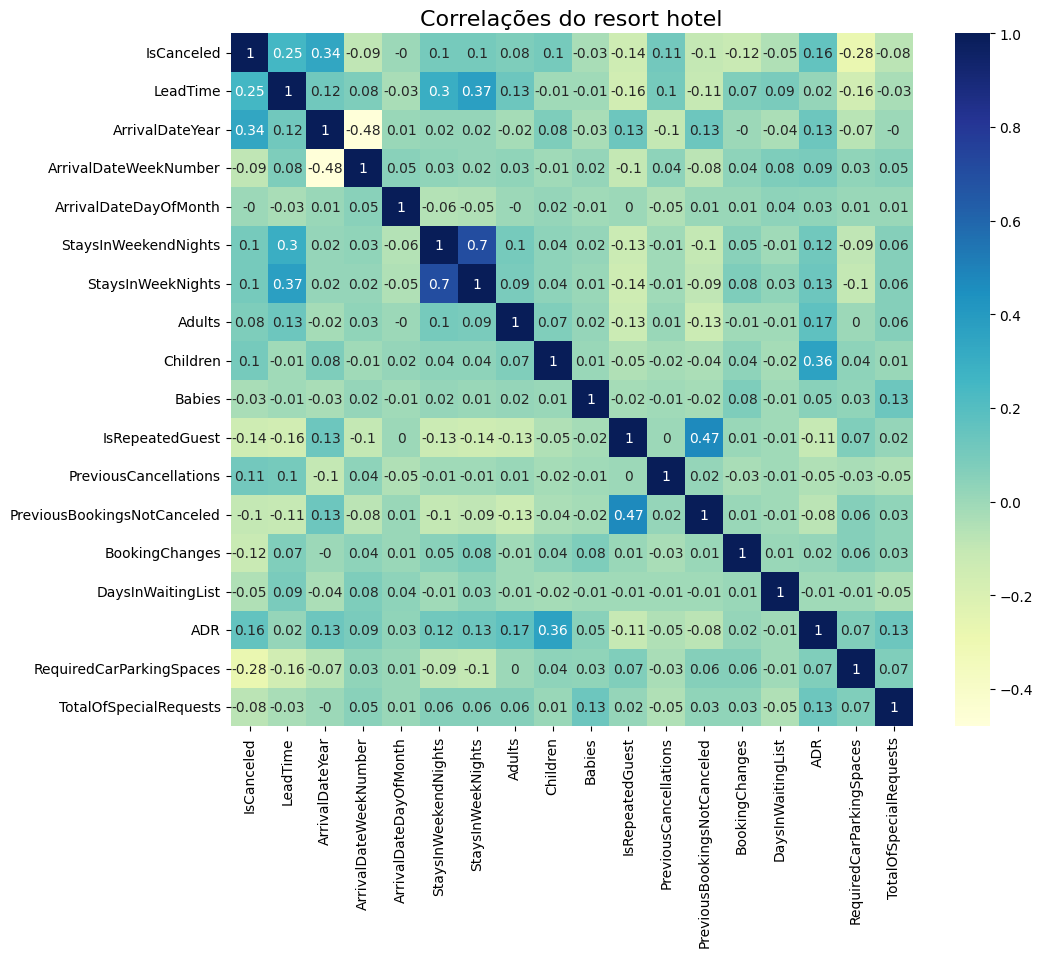

In [ ]:
corr_matrix = resort_hotel.corr()

rounded_corr_matrix = corr_matrix.round(2)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(rounded_corr_matrix, annot=True, cmap="YlGnBu")
ax.set_title("Correlações do resort hotel", fontsize=16)

plt.show()

A partir da matriz de correlações visualizada em um mapa de calor, podemos começar a ter uma noção do quais fatores estão se correlacionando positivamente ou negativamente com os cancelamentos. A correlação que aparece moderada é com o número da semana de chegada (0,35), no entanto não me parece haver causalidade. Algumas correlações, que apesar de fracas valem destacar são:

- Tempo de antecedência: Há uma correlação de 0,25 para o tempo decorrente entre a reserva e a data de chegada e um possível cancelamento.
- ADR: A tarifa média diária, parece ter alguma influência no cancelamento (0,16)
- Cancelamentos prévios: O fato de terem havido cancelamento prévios também se correlaciona (0,11) com novos cancelamentos.

<ipython-input-29-ef9d1d2ef499>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = resort_hotel.corr()


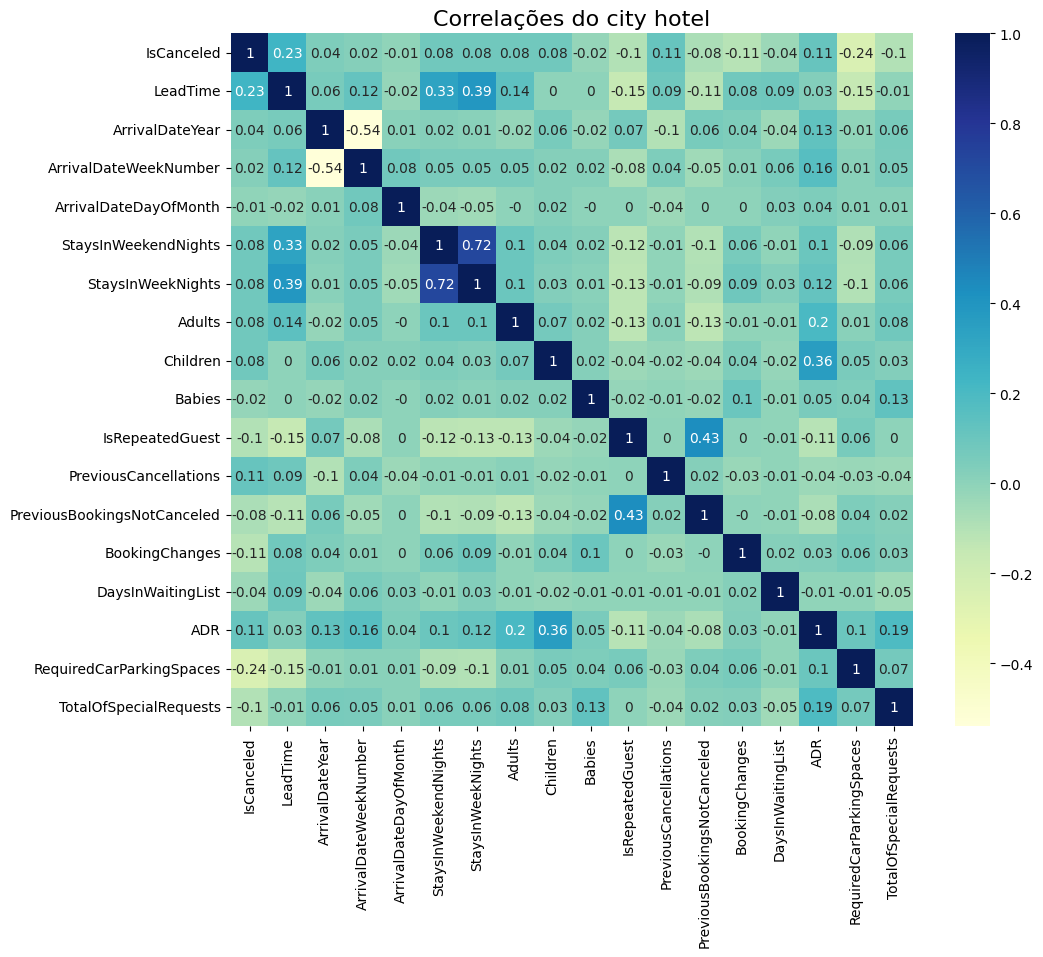

In [ ]:
corr_matrix2 = resort_hotel.corr()
rounded_corr_matrix2 = corr_matrix2.round(2)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(rounded_corr_matrix2, annot=True, cmap="YlGnBu")
ax.set_title("Correlações do city hotel", fontsize=16)

plt.show()

Na matriz do city hotel vemos que o padrão se repete, com a diferença que não há correlação entre a semana de chegada. As variáveis com correlação mais evidente também são ADR, tempo de antecedência e cancelamentos prévios. No entanto, apesar de relevantes não explicam completamente a causa dos cancelamentos.

Para estudar mais afundo as correlações, será intessante que sejam plotadas em diagrama de dispersão.

####Para buscar entender o que vem causando as notadas altas taxas de cancelamento, primeiro vamos verificar como tem se comportado a distribuição dos cancelamentos em valores absolutos e ao longo do tempo nos 2 hotéis.

In [ ]:
qtd_de_cancelamentos2 = resort_hotel.IsCanceled.value_counts().reset_index()
qtd_de_cancelamentos2.columns = ['Foi cancelado?', 'Quantidade']
qtd_de_cancelamentos2['Foi cancelado?'].replace({0: 'Não', 1: 'Sim'}, inplace=True)
qtd_de_cancelamentos2['Porcentagem (%)'] = round((qtd_de_cancelamentos2['Quantidade'] / qtd_de_cancelamentos2['Quantidade'].sum()) * 100, 2)
qtd_de_cancelamentos2.loc[len(qtd_de_cancelamentos2)] = ['Total', qtd_de_cancelamentos2['Quantidade'].sum(), 100.00]
qtd_de_cancelamentos2

,Foi cancelado?,Quantidade,Porcentagem (%)
0,Não,28938,72.24
1,Sim,11122,27.76
2,Total,40060,100.00


In [ ]:
qtd_de_cancelamentos = city_hotel.IsCanceled.value_counts().reset_index()
qtd_de_cancelamentos.columns = ['Foi cancelado?', 'Quantidade']
qtd_de_cancelamentos['Foi cancelado?'].replace({0: 'Não', 1: 'Sim'}, inplace=True)
qtd_de_cancelamentos['Porcentagem (%)'] = round((qtd_de_cancelamentos['Quantidade'] / qtd_de_cancelamentos['Quantidade'].sum()) * 100, 2)
qtd_de_cancelamentos.loc[len(qtd_de_cancelamentos)] = ['Total', qtd_de_cancelamentos['Quantidade'].sum(), 100.00]
qtd_de_cancelamentos

,Foi cancelado?,Quantidade,Porcentagem (%)
0,Não,46228,58.27
1,Sim,33102,41.73
2,Total,79330,100.00


Podemos perceber que a porcentagem de cancelamentos do city_hotel foi maior do que do resort hotel. No entanto, o city hotel também possui uma quantidade de reservas quase 2 vezes maior que o resort.

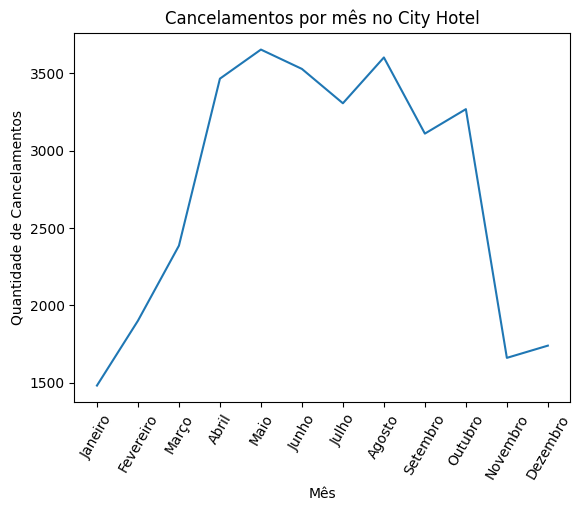

In [ ]:
traduções = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}
# Agrupe os dados por mês
cancelamentos_por_mes = city_hotel.groupby('ArrivalDateMonth')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_mes = cancelamentos_por_mes.replace(traduções)

# Ordenando os meses
cancelamentos_por_mes["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes = cancelamentos_por_mes.sort_values(by='ArrivalDateMonth', ascending = True)

# Crie um gráfico de linhas
plt.plot(cancelamentos_por_mes['ArrivalDateMonth'], cancelamentos_por_mes['Cancelamentos'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title("Cancelamentos por mês no City Hotel")
plt.show()

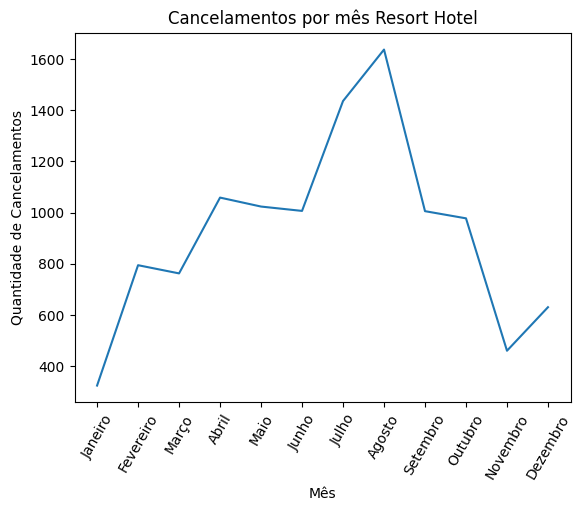

In [ ]:
# Agrupe os dados por mês
cancelamentos_por_mes_resort = resort_hotel.groupby('ArrivalDateMonth')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.replace(traduções)

# Ordenando os meses
cancelamentos_por_mes_resort["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes_resort["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.sort_values(by='ArrivalDateMonth', ascending = True)

# Crie um gráfico de linhas
plt.plot(cancelamentos_por_mes_resort['ArrivalDateMonth'], cancelamentos_por_mes_resort['Cancelamentos'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.xticks(rotation = 60)
plt.title('Cancelamentos por mês Resort Hotel')
plt.show()

Observando os 2 gráficos, podemos notar um padrão para um maior número de cancelamentos entre os meses de abril e outubro para os 2 hotéis, demonstrando sazonalidade para a alta de cancelamentos. Sendo que no mês de agosto houve um pico de cancelamentos no Resort hotel, enquanto os picos do City Hotel ocorreram em Maio e Agosto.

In [ ]:
cancelamentos_por_ano_resort = resort_hotel.groupby('ArrivalDateYear')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_ano_resort

,ArrivalDateYear,Cancelamentos
0,2015,2138
1,2016,4930
2,2017,4054


In [ ]:
cancelamentos_por_ano_city = city_hotel.groupby('ArrivalDateYear')['IsCanceled'].sum().reset_index(name='Cancelamentos')
cancelamentos_por_ano_city

,ArrivalDateYear,Cancelamentos
0,2015,6004
1,2016,15407
2,2017,11691


Vemos o padrão se repetir também nos cancelamentos anuais, visto que o cancelamento de 2015 para 2016 aumentou em mais de 200% nos 2 hotéis e diminuiu para 2017.

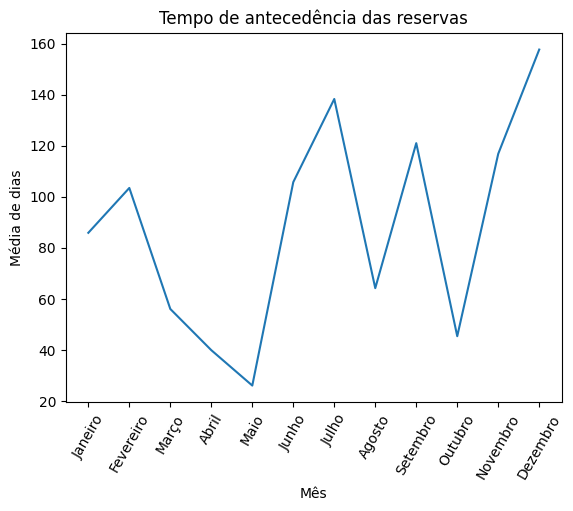

In [ ]:
# Agrupe os dados por mês
tempo_reserva = resort_hotel.groupby('ArrivalDateMonth')['LeadTime'].mean().reset_index(name='Tempo Reserva')
tempo_reserva = tempo_reserva.replace(traduções)

# Ordenando os meses
tempo_reserva["ArrivalDateMonth"] = pd.Categorical(cancelamentos_por_mes_resort["ArrivalDateMonth"],
                             categories=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"])
cancelamentos_por_mes_resort = cancelamentos_por_mes_resort.sort_values(by='ArrivalDateMonth', ascending = True)

# Crie um gráfico de linhas
plt.plot(tempo_reserva['ArrivalDateMonth'], tempo_reserva['Tempo Reserva'])
plt.xlabel('Mês')
plt.ylabel('Média de dias')
plt.xticks(rotation = 60)
plt.title('Tempo de antecedência das reservas')

plt.show()